In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [2]:
classifier = VGG16(weights='.../VGG16/vgg16_weights_tf_dim_ordering_tf_kernels_3.h5')
classifier.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

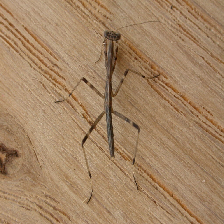

In [3]:
new_image = image.load_img('.../Prediction/stick_insect.jpg', target_size=(224, 224))
new_image

In [4]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

In [5]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

In [6]:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[-7.9390030e+00,  1.6221001e+01,  4.3320000e+01],
         [ 4.0609970e+00,  2.4221001e+01,  5.0320000e+01],
         [ 1.6060997e+01,  3.1221001e+01,  5.8320000e+01],
         ...,
         [ 7.0609970e+00,  2.1221001e+01,  4.0320000e+01],
         [-1.9390030e+00,  1.6221001e+01,  3.4320000e+01],
         [-6.9390030e+00,  1.4221001e+01,  3.1320000e+01]],

        [[ 9.0609970e+00,  3.3221001e+01,  6.0320000e+01],
         [ 6.0997009e-02,  2.2221001e+01,  4.8320000e+01],
         [ 8.0609970e+00,  3.0221001e+01,  5.6320000e+01],
         ...,
         [-6.9390030e+00,  1.1221001e+01,  2.9320000e+01],
         [-2.9390030e+00,  1.4221001e+01,  3.2320000e+01],
         [ 6.0609970e+00,  2.0221001e+01,  3.9320000e+01]],

        [[ 1.2060997e+01,  3.7221001e+01,  6.5320000e+01],
         [ 9.0609970e+00,  2.8221001e+01,  5.7320000e+01],
         [-9.3900299e-01,  1.8221001e+01,  4.6320000e+01],
         ...,
         [-6.9390030e+00,  9.2210007e+00,  2.9320000e+01],
         [

In [7]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[4.20801001e-07, 1.85149440e-06, 1.72603768e-06, 6.74639978e-07,
        2.90294956e-05, 1.41929286e-05, 1.74058496e-05, 2.25154690e-06,
        3.92202128e-06, 3.81487462e-06, 2.03908603e-05, 7.45411171e-06,
        1.39733811e-05, 3.40704864e-05, 1.97255576e-05, 8.12560211e-06,
        1.07098613e-05, 1.75456789e-05, 1.65950187e-05, 3.28232491e-05,
        2.71379595e-05, 3.08922040e-06, 5.62459854e-06, 4.76781133e-06,
        3.33080584e-06, 1.75298075e-04, 1.81244643e-04, 5.84388501e-04,
        5.18917921e-04, 1.52494965e-06, 4.99000198e-05, 1.14880531e-04,
        2.61764013e-04, 1.82702497e-05, 4.02525657e-05, 4.16309631e-05,
        1.92799725e-05, 3.59773003e-05, 4.23901831e-04, 1.51135691e-05,
        6.44550484e-04, 8.87280621e-04, 4.66298952e-04, 1.93320411e-05,
        9.86683764e-04, 1.36961418e-04, 4.52993234e-04, 4.66539095e-05,
        5.22621849e-06, 2.25346394e-05, 1.38733158e-05, 3.28813803e-06,
        3.18511651e-04, 1.59393036e-04, 1.35746421e-04, 1.172754

In [8]:
y_pred.shape

(1, 1000)

In [9]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred, top=5)

# result: list of (class_name, class_description, score)

[[('n02231487', 'walking_stick', 0.30522653),
  ('n01775062', 'wolf_spider', 0.25962162),
  ('n03804744', 'nail', 0.14611949),
  ('n01770081', 'harvestman', 0.06661857),
  ('n01773549', 'barn_spider', 0.036306225)]]

In [10]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

walking_stick (30.52%)
